<a href="https://colab.research.google.com/github/Jayameena832/Pair_Trading/blob/main/Pair_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# import the libraries
!pip install pandas_datareader
import numpy as np
import pandas as pd
import statsmodels
from statsmodels.tsa.stattools import coint   # use this library to find this out the p_value
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import datetime

In [4]:
def downloadStockData(tickers,start,end):
    """
        This function downloads the Close price of the stock and creates a dataframe from it
        Params:
            tickers : a list of ticker of various stocks
            start   : it is the start date of the data to be downloaded. It is a datetime in datetime format.
            end     : it is the end date of the data to be downloaded. It is a datetime in datetime format.

        Return:
            A dataframe with all the close for of each stock on each open market day
    """
    ticker_data = pdr.get_data_yahoo(tickers, start, end)['Adj Close']
    return ticker_data

In [5]:
!pip install yfinance
import yfinance as yf
tickers = ['ADANIPORTS.NS',
 'TECHM.NS',
 'BRITANNIA.NS',
 'TCS.NS',
 'SUNPHARMA.NS',
 'INFY.NS',
 'HINDALCO.NS',
 'DRREDDY.NS',
 'HCLTECH.NS',
 'HINDUNILVR.NS',
 'TATASTEEL.NS',
 'NTPC.NS',
 'CIPLA.NS',
 'ITC.NS',
 'BPCL.NS',
 'WIPRO.NS',
 'JSWSTEEL.NS',
 'GAIL.NS',
 'DIVISLAB.NS',
 'ULTRACEMCO.NS',
 'NESTLEIND.NS',
 'ASIANPAINT.NS',
 'EICHERMOT.NS',
 'IOC.NS',
 'GRASIM.NS',
 'BAJAJ-AUTO.NS',
 'M&M.NS',
 'UPL.NS',
 'SHREECEM.NS',
 'MARUTI.NS',
 'TITAN.NS',
 'BAJAJFINSV.NS',
 'KOTAKBANK.NS',
 'COALINDIA.NS',
 'BHARTIARTL.NS',
 'HEROMOTOCO.NS',
 'LT.NS',
 'ONGC.NS',
 'SBIN.NS',
 'RELIANCE.NS',
 'BAJFINANCE.NS',
 'AXISBANK.NS',
 'HDFCBANK.NS',
 'TATAMOTORS.NS',
 'ICICIBANK.NS',
 'POWERGRID.NS',
 'INDUSINDBK.NS']
start = datetime.datetime(2013,1,1)
end = datetime.datetime(2022,1,1)
#data = downloadStockData(tickers,start,end)

yf.pdr_override()
data = pd.DataFrame()
for i in range(len(tickers)):
    try:
        o = pdr.get_data_yahoo(tickers[i],start, end)
        data[str(tickers[i])] = o["Close"]
    except:
        print('error')
        print(i)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [6]:
data.dropna(inplace = True)
data

,ADANIPORTS.NS,TECHM.NS,BRITANNIA.NS,TCS.NS,SUNPHARMA.NS,INFY.NS,HINDALCO.NS,DRREDDY.NS,HCLTECH.NS,HINDUNILVR.NS,...,ONGC.NS,SBIN.NS,RELIANCE.NS,BAJFINANCE.NS,AXISBANK.NS,HDFCBANK.NS,TATAMOTORS.NS,ICICIBANK.NS,POWERGRID.NS,INDUSINDBK.NS
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,137.800003,233.412506,250.675003,632.075012,369.750000,288.606262,134.149994,1835.750000,155.537506,530.599976,...,178.433334,242.645004,416.402924,132.635406,272.540009,342.250000,313.388580,210.627274,85.387520,423.250000
2013-01-02,138.449997,234.925003,252.149994,631.650024,370.450012,288.649994,135.000000,1837.699951,156.312500,530.500000,...,183.066666,245.054993,419.993866,131.178040,277.369995,343.674988,314.625336,213.454544,84.825020,433.000000
2013-01-03,138.300003,235.337494,253.850006,640.299988,366.924988,292.237488,134.399994,1882.300049,156.487503,532.349976,...,186.533340,247.160004,426.333771,134.709747,277.989990,341.674988,314.724274,213.100006,85.612518,434.299988
2013-01-04,137.500000,235.625000,255.100006,649.599976,367.575012,293.693756,132.550003,1889.349976,158.512497,534.700012,...,189.866669,248.669998,426.878632,134.772888,275.790009,339.674988,312.052917,214.981812,86.212524,430.750000
2013-01-07,140.050003,231.762497,250.899994,647.424988,372.075012,296.850006,134.399994,1887.599976,156.975006,525.400024,...,192.000000,246.759995,424.278259,134.573715,274.570007,334.100006,309.925751,214.936356,85.800018,431.350006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,723.200012,1785.000000,3513.199951,3696.100098,794.099976,1866.150024,452.799988,4736.899902,1267.199951,2301.399902,...,137.350006,458.049988,2370.250000,6890.750000,672.150024,1450.800049,471.149994,736.000000,206.100006,855.250000
2021-12-28,729.250000,1806.099976,3550.649902,3706.550049,815.099976,1888.000000,458.149994,4743.799805,1283.900024,2309.100098,...,139.500000,461.200012,2398.399902,6906.649902,675.450012,1460.800049,480.200012,735.799988,205.600006,852.650024
2021-12-29,722.750000,1786.849976,3559.600098,3694.699951,838.799988,1885.550049,454.250000,4833.149902,1291.900024,2306.850098,...,138.899994,454.399994,2402.500000,6911.649902,670.500000,1453.849976,476.000000,735.700012,204.600006,870.000000


In [7]:
def findCointegrationValue(data,p_value_threshold=0.05):
    """
        This function find out the pairs of stock with p value less than a constant
        Params:
            data               : the dataframe containning all the close for of each stock on each open market day
            p_value_threshold  : the threshold value for the p value of pairs of stocks. We consider a 2 stocks to be cointegrted only if the p value is less than this value

        Returns:
            p values of all the pairs , the list of all the pairs with p value less than the threshold
    """
    n = data.shape[1]
    score_ = np.zeros((n, n))
    pvalue_ = np.zeros((n, n))
    keys = data.keys()
    pairs = []

    for i in range(n):
        for j in range(i+1, n):
            s1 = data[keys[i]]
            s2 = data[keys[j]]
            result = coint(s1, s2)
            score_[i, j] = result[0]
            pvalue_[i, j] = result[1]

            if result[1] < p_value_threshold:
                pairs.append((keys[i], keys[j], result[1]))


    return score_, pvalue_, pairs

scores_final, pvalues_final, pairs_final =  findCointegrationValue(data=data)

def getBestKCointergratedStocks(data,k=10,p_value_threshold=0.05):
    """
        This functions find out the k pairs with the least p value and all of them should be less than the threshold
        Params:
            data               : The list of tuples containing X, Y, and corresponding pvalue (< p_value_threshold)
            k                  : the number of pairs to be found out
            p_value_threshold  : the threshold value for the p value of pairs of stocks. We consider a 2 stocks to be cointegrted only if the p value is less than this value

        Returns:
            the p value for all the pairs of stocks , the list k pairs with the least p value and their p values . If k such pairs doesn't exists return how many of them occur
    """

    df = pd.DataFrame(data, columns=['X', 'Y', 'pvalue'])

    return df.sort_values(by='pvalue').head(k)

df = getBestKCointergratedStocks(pairs_final, p_value_threshold=0.05)

In [8]:
df

,X,Y,pvalue
41,KOTAKBANK.NS,HDFCBANK.NS,0.000149
39,UPL.NS,POWERGRID.NS,0.000240
18,NTPC.NS,ITC.NS,0.000328
34,BAJAJ-AUTO.NS,SHREECEM.NS,0.000863
30,NESTLEIND.NS,RELIANCE.NS,0.001836
15,HINDUNILVR.NS,KOTAKBANK.NS,0.002752
1,ADANIPORTS.NS,ULTRACEMCO.NS,0.003526
33,BAJAJ-AUTO.NS,UPL.NS,0.006211
20,NTPC.NS,IOC.NS,0.006350
9,INFY.NS,HCLTECH.NS,0.007505


In [9]:
def check_for_stationarity(X, cutoff=0.01):
        # H_0 in adfuller is unit root exists (non-stationary)\n",
        # We must observe significant p-value to convince ourselves that the series is stationary\n",
        pvalue = adfuller(X)[1]
        if pvalue < cutoff:
            print ('p-value = ' + str(pvalue) + ' The series ' + X.name +' is likely stationary')
            return True
        else:
            print ('p-value = ' + str(pvalue) + ' The series ' + X.name +' is likely non-stationary')
            return False

In [10]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

X1 = data["SBIN.NS"]
X2 = data["BAJAJFINSV.NS"]
X1 = sm.add_constant(X1)
results = sm.OLS(X2, X1).fit()

results.params

const     -724.096000
SBIN.NS      4.495983
dtype: float64

0.05274986853907966

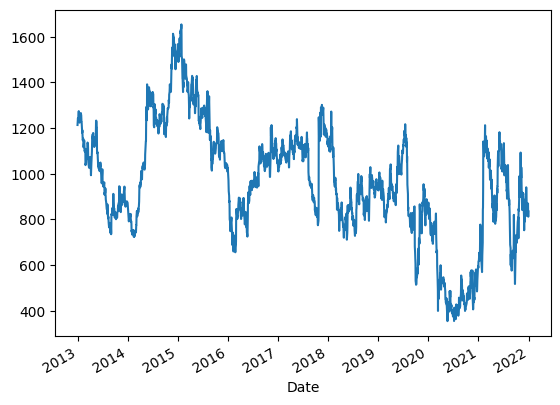

In [11]:
(5.377*data["SBIN.NS"]-data["BAJAJFINSV.NS"]).plot()
adfuller(5.377*data["SBIN.NS"]-data["BAJAJFINSV.NS"])[1]

In [12]:
tickers = ['SBIN.NS','BAJAJFINSV.NS']
start = datetime.datetime(2020,11,20)
end = datetime.datetime(2021,6,30)
#data = downloadStockData(tickers,start,end)

yf.pdr_override()
datanew = pd.DataFrame()
for i in range(len(tickers)):
    try:
        o = pdr.get_data_yahoo(tickers[i],start, end)
        datanew[str(tickers[i])] = o["Close"]
    except:
        print('error')
        print(i)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [13]:
datanew

,SBIN.NS,BAJAJFINSV.NS
Date,,
2020-11-20,242.750000,854.260010
2020-11-23,238.699997,877.434998
2020-11-24,243.850006,885.969971
2020-11-25,243.000000,871.775024
2020-11-26,245.449997,880.669983
...,...,...
2021-06-23,418.850006,1228.224976
2021-06-24,417.200012,1233.324951
2021-06-25,428.799988,1248.660034


               0     SBIN.NS  BAJAJFINSV.NS    zscore
0     610.847620  281.049988     889.875000  1.668662
1     622.375453  281.750000     882.085022  1.701294
2     643.446410  285.049988     878.635010  1.897191
3     637.431767  287.700012     898.799988  1.685528
4     609.994227  286.000000     917.159973  1.187096
..           ...         ...            ...       ...
115  1008.308402  418.850006    1228.224976 -0.402880
116   994.397954  417.200012    1233.324951 -0.666922
117  1041.003261  428.799988    1248.660034 -0.208618
118  1040.926936  426.750000    1237.790039 -0.287078
119  1020.693560  421.500000    1229.989990 -0.738468

[120 rows x 4 columns]
0.447009871272431
Hedged profit 11.527833209228515
Hedged profit 21.070957025146484
Hedged profit -6.01464266357422
Hedged profit -27.437540533447265
Hedged profit -0.1389622070312484
Hedged profit 56.1069609375
Hedged profit 92.89267899780273
Hedged profit -34.795233645629885
Hedged profit 19.68168304748535
Hedged profit -52.

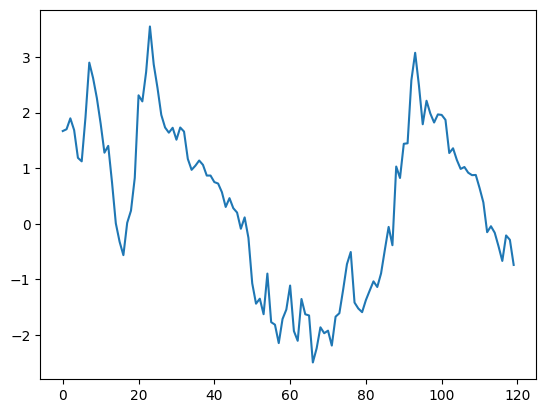

In [14]:
import numpy as np
import pandas as pd
import statsmodels
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import coint   # use this library to find this out the p_value
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import datetime

def trade8(S1, S2,window, MAX_SHORTING_AMOUNT, MAX_TRANSACTION_AT_A_TIME,error_bound1,error_bound2):

    spread = []
    beta = 5.3397
    spread.append(beta*S1 - S2)
    df = pd.DataFrame(spread)
    df = df.T
    df["SBIN.NS"] = datanew["SBIN.NS"]
    df["BAJAJFINSV.NS"] = datanew["BAJAJFINSV.NS"]
    df["Roll mean"] = df[0].rolling(window = 30).mean()
    df["Roll std"] = df[0].rolling(window = 30).std()
    df["zscore"] = (df[0]-df["Roll mean"])/df["Roll std"]
    df = df.drop(["Roll mean", "Roll std"], axis = 1)
    df = df.dropna()
    df = df.reset_index(drop=True)
    print(df)
    df["zscore"].plot()
    print(adfuller(df["zscore"].dropna())[1])
    df["Buy"] = 0
    df["Sell"] = 0
    for i in range(len(df)) :
      if i==0 :
        df.loc[i,"Buy"] = 1 if df.loc[i,"zscore"]>1.5 and df.loc[i,"zscore"]<2 else 0
      else :
        if df.loc[i,"zscore"]>1.5 and df.loc[i,"zscore"]<2:
          df.loc[i,"Buy"] = 1
        if df.loc[i-1, "Buy"] == 1 and df.loc[i,"zscore"]>1 and df.loc[i,"zscore"]<2:
          df.loc[i,"Buy"] = 1
    for i in range(len(df)) :
      if i==0 :
        df.loc[i,"Sell"] = 1 if df.loc[i,"zscore"]<-1.5 and df.loc[i,"zscore"]>-2 else 0
      else :
        if df.loc[i,"zscore"]<-1.5 and df.loc[i,"zscore"]>-2:
          df.loc[i,"Sell"] = 1
        if df.loc[i-1, "Sell"] == 1 and df.loc[i,"zscore"]<-1 and df.loc[i,"zscore"]>-2:
          df.loc[i,"Sell"] = 1
    money = 0
    for i in range(len(df)-1) :
      if df.loc[i,"Buy"] == 1 :
        money += beta*(df.loc[i+1,"SBIN.NS"]-df.loc[i,"SBIN.NS"])
        #print("Long profit HDFC %s" %(beta*(df.loc[i+1,"SBIN.NS"]-df.loc[i,"SBIN.NS"]))  )
        money -= (df.loc[i+1,"BAJAJFINSV.NS"] - df.loc[i,"BAJAJFINSV.NS"])
        #print("Short profit BAJAJFINSV %s" %(df.loc[i,"BAJAJFINSV.NS"] - df.loc[i+1,"BAJAJFINSV.NS"]))
        print("Hedged profit %s" %(df.loc[i,"BAJAJFINSV.NS"] - df.loc[i+1,"BAJAJFINSV.NS"] + beta*(df.loc[i+1,"SBIN.NS"]-df.loc[i,"SBIN.NS"])))

      elif df.loc[i,"Sell"] == 1:
        money += (df.loc[i+1,"BAJAJFINSV.NS"] - df.loc[i,"BAJAJFINSV.NS"])
        #print("Long profit BAJAJFINSV %s" %(df.loc[i+1,"BAJAJFINSV.NS"] - df.loc[i,"BAJAJFINSV.NS"]))
        money -= beta*(df.loc[i+1,"SBIN.NS"]-df.loc[i,"SBIN.NS"])
        #print("Short profit HDFC %s" %(beta*(df.loc[i,"SBIN.NS"]-df.loc[i+1,"SBIN.NS"])) )
        print("Hedged profit %s" %(beta*(df.loc[i,"SBIN.NS"]-df.loc[i+1,"SBIN.NS"]) + df.loc[i+1,"BAJAJFINSV.NS"] - df.loc[i,"BAJAJFINSV.NS"]))

    print(df)
  ##print(df.head(60))
    print(money)

trade8( datanew['SBIN.NS'],datanew['BAJAJFINSV.NS'], 60,10000,5,0.5,0.25)


#**Reaons why those 2 stocks are similar. (Explain for any 2 stocks in this text cell)**
We know that the Pairs trading strategies speculate on future convergence of spread between similar securities. Similarity concerns industry, sector, market capitalization, and other common exposures that might imply a comovement between stocks.

Take example of Adobe and Microsoft, These companies share the same sector, i.e., IT, and even their Industry is same, i.e., Software—Infrastructure. They deal with same type of technologies such as 3d modelling, Cloud systems, Application Software.

Hence it can be understood that companies sharing common industry and type of sector, are leveraged by the macroecomic factors like GDP growth, etc has a similar kind of effect on their trade. As we know pairs trading is a market neutral trading strategy enabling traders to profit from virtually any market conditions: uptrend, downtrend, or sideways movement and both these stocks fulfill this in as a pair. So, that's why the particular stocks are similar.